In [2]:

# Import (run also for neural network)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 32.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 46.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 47.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:

# load data set 
data_no_outliers = pd.read_parquet('data/final_data_cleaned_NIET_scaled.parquet')
data_no_outliers.head()


,passenger_count,trip_distance,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,payment_type_1,...,Trip_Staten Island->Brooklyn,Trip_Staten Island->Manhattan,Trip_Staten Island->Queens,Trip_Staten Island->Staten Island,trip_duration,pickup_hour,pickup_day,peak_times,weekend,total_amount_no_tip
0,1.0,9.76,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,18.750000,0.0,6.0,0,1,47.250000
1,1.0,7.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,32.183334,23.0,5.0,0,1,42.299999
2,4.0,20.07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,34.183334,0.0,6.0,0,1,82.690002
3,3.0,2.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,15.000000,0.0,6.0,0,1,20.600000
4,1.0,5.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,22.200001,0.0,6.0,0,1,31.799999


In [12]:
#regression as a function

import statsmodels.api as sm

def train_regression_with_significance(data, target_column, not_hot_columns, test_size=0.2, random_state=42):
    # Split features and target
    y = data[target_column]
    X = data.drop(columns=[target_column])

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Scale only the selected columns
    scaler = MinMaxScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train[not_hot_columns]),
        columns=not_hot_columns,
        index=X_train.index
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test[not_hot_columns]),
        columns=not_hot_columns,
        index=X_test.index
    )

    # Add constant for intercept
    X_train_sm = sm.add_constant(X_train_scaled)

    # Fit using statsmodels
    model = sm.OLS(y_train, X_train_sm).fit()

    # Prediction and evaluation
    X_test_sm = sm.add_constant(X_test_scaled)
    y_pred = model.predict(X_test_sm)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")
    print("📊 Regression Coefficients with Significance:\n")
    print(model.summary())

    return model, scaler, model.summary2().tables[1]



In [13]:

not_hot_columns = [
    'passenger_count', 'trip_distance', 'trip_duration',
    'pickup_hour', 'pickup_day', 'peak_times', 'weekend'
]

model, scaler, coef_table = train_regression_with_significance(
    data_no_outliers,
    target_column='total_amount_no_tip',
    not_hot_columns=not_hot_columns
)


Mean Squared Error: 21.6905
R-squared: 0.9249

📊 Regression Coefficients with Significance:

                             OLS Regression Results                            
Dep. Variable:     total_amount_no_tip   R-squared:                       0.924
Model:                             OLS   Adj. R-squared:                  0.924
Method:                  Least Squares   F-statistic:                 4.300e+06
Date:                 Sat, 05 Apr 2025   Prob (F-statistic):               0.00
Time:                         21:59:21   Log-Likelihood:            -7.3328e+06
No. Observations:              2472729   AIC:                         1.467e+07
Df Residuals:                  2472721   BIC:                         1.467e+07
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [14]:
def predict_fare(model, scaler, not_hot_columns, input_dict):
    import pandas as pd
    import statsmodels.api as sm

    # Create a dataframe
    input_df = pd.DataFrame([input_dict], columns=not_hot_columns)

    # Scaling
    input_scaled = pd.DataFrame(scaler.transform(input_df), columns=not_hot_columns)

    input_scaled_with_const = sm.add_constant(input_scaled, has_constant='add')

    # Align columns with model
    input_scaled_with_const = input_scaled_with_const[model.params.index]

    # Prediction
    predicted_fare = model.predict(input_scaled_with_const)[0]

    return predicted_fare


In [15]:
#test with random input

example_input = {
    'passenger_count': 2,
    'trip_distance': 1,
    'trip_duration': 13.5,
    'pickup_hour': 18,
    'pickup_day': 2,
    'peak_times': 1,
    'weekend': 0
}

fare = predict_fare(model, scaler, not_hot_columns, example_input)
print(f"Predicted fare (excluding tip): ${fare:.2f}")


Predicted fare (excluding tip): $17.78


In [16]:
#repeat not hot columns for neural network

not_hot_columns = [
    'passenger_count', 'trip_distance', 'trip_duration',
    'pickup_hour', 'pickup_day', 'peak_times', 'weekend'
]

Epoch 1/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 13s 358us/step - loss: 44.8604 - mae: 2.7449 - val_loss: 17.2189 - val_mae: 1.5706
Epoch 2/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 355us/step - loss: 16.9562 - mae: 1.5687 - val_loss: 16.8499 - val_mae: 1.5031
Epoch 3/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 357us/step - loss: 16.8162 - mae: 1.5429 - val_loss: 16.7175 - val_mae: 1.4696
Epoch 4/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 356us/step - loss: 16.4633 - mae: 1.5190 - val_loss: 16.5479 - val_mae: 1.4939
Epoch 5/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 356us/step - loss: 16.4113 - mae: 1.5175 - val_loss: 16.4998 - val_mae: 1.4940
Epoch 6/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 355us/step - loss: 16.2130 - mae: 1.5057 - val_loss: 16.3734 - val_mae: 1.4734
Epoch 7/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 356us/step - loss: 16.1627 - mae: 1.5081 - val_loss: 16.2491 - val_mae: 1.4888
Epoch 8/100
34773/34773 ━━━━━━━━━━━━━━━━━━━━ 12s 357us/step - loss: 16.0584 - mae: 1.4965 - val_loss: 16

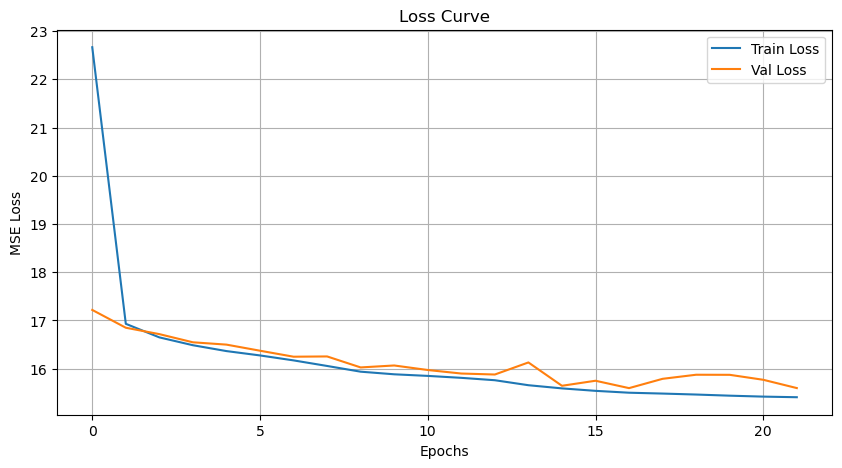

In [17]:
#neural network (testing linear assumption)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# using 'data_no_outliers' as DataFrame and 'not_hot_columns' as feature columns
X_nn = data_no_outliers[not_hot_columns].values
y_nn = data_no_outliers['total_amount_no_tip'].values

# Scale
scaler_nn = MinMaxScaler()
X_scaled_nn = scaler_nn.fit_transform(X_nn)

# Train/test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_scaled_nn, y_nn, test_size=0.2, random_state=42
)

# model
model_nn = Sequential([
    Input(shape=(X_train_nn.shape[1],)),  
    Dense(32, activation='relu'),        
    Dense(16, activation='relu'),
    Dense(1)                              
])

model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# train model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_nn.fit(
    X_train_nn, y_train_nn,
    validation_split=0.1,
    epochs=100,
    batch_size=64,  
    callbacks=[early_stop],
    verbose=1
)

# Model evaluation
y_pred_nn = model_nn.predict(X_test_nn).flatten()

mse_nn = mean_squared_error(y_test_nn, y_pred_nn)
mae_nn = mean_absolute_error(y_test_nn, y_pred_nn)
r2_nn = r2_score(y_test_nn, y_pred_nn)

print(f"🔍 Neural Network Results:")
print(f"Mean Squared Error: {mse_nn:.4f}")
print(f"Mean Absolute Error: {mae_nn:.4f}")
print(f"R-squared: {r2_nn:.4f}")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()